<a href="https://colab.research.google.com/github/BountyHunter1999/Machine-Learning-Zoom-Camp/blob/main/Homeworks/Homework%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-16 08:01:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.2’

AB_NYC_2019.csv.2   100%[===================>]   6.75M  --.-KB/s    in 0.08s   

2021-09-16 08:01:49 (82.4 MB/s) - ‘AB_NYC_2019.csv.2’ saved [7077973/7077973]



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

In [ ]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
price = df["price"]
price

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [ ]:
help(sb.histplot)

Help on function histplot in module seaborn.distributions:

histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)
    Plot univariate or bivariate histograms to show distributions of datasets.
    
    A histogram is a classic visualization tool that represents the distribution
    of one or more variables by counting the number of observations that fall within
    disrete bins.
    
    This function can normalize the statistic computed within each bin to estimate
    frequency, density or probability mass, and it can add a smooth curve obtained
    using a kernel density estimate,

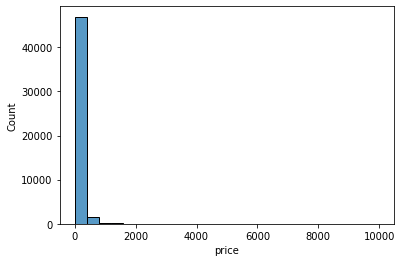

In [ ]:
sb.histplot(price, bins=25)

# GETTING ONLY THE REQUIRED FEATURES

In [ ]:
df = df[['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']]

In [ ]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [ ]:
len(df.columns)

8

# Question 1
## Find a feature with missing values. How many missing values does it have?

*   reviews_per_month                 10052




In [ ]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Question 2
## What's the median (50% percentile) for variable 'minimum_nights'?



In [ ]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Split the data
* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('price') is not in your dataframe.
* Apply the log transformation to the price variable using the np.log1p() function.


In [ ]:
np.random.seed(42)

In [ ]:
n = len(df)
n

48895

In [ ]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [ ]:
np.random.shuffle(idx)
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [ ]:
n_train = int(n * 0.6) 
n_val = int(n * 0.2) 
n_test = int(n * 0.2) 

n_train, n_val , n_test

(29337, 9779, 9779)

**Seeing how we can get our shuffled dataset**

In [ ]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [ ]:
idx[:n_train][:5]

array([  879, 44383, 15394, 43230, 16332])

In [ ]:
df.iloc[:n_train][:5]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0


In [ ]:
df.iloc[idx[:n_train]][:5]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30


**Checking the total number of train, val and test dataset**

In [ ]:
df_train = df.iloc[idx[:n_train]]
len(df_train)

29337

In [ ]:
df_val = df.iloc[idx[n_train:n_train + n_val]]
len(df_val)

9779

In [ ]:
df_test = df.iloc[idx[n_train + n_val:]]
len(df_test)

9779

**Our Final Dataset**

In [ ]:
df_train[:4]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272


In [ ]:
df_train = df_train.reset_index(drop=True)
df_train[:4]

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272


In [ ]:
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**Checking if division of the data is as required**

In [ ]:
len(df_test) + len(df_val) + len(df_train) == n

True

**Separating our target dataset from the original dataset**

In [ ]:
y = df["price"]

In [ ]:
del df["price"]

In [ ]:
df.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
"price" in df.columns

False

Apply the log transformation to the price variable using the `np.log1p() ` function.

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
type(y.values)

numpy.ndarray

In [ ]:
y = y.values
y[:4]

array([149, 225, 150,  89])

In [ ]:
y = np.log1p(y)
y[:4]

array([5.01063529, 5.420535  , 5.01727984, 4.49980967])

In [ ]:
np.log(149)

5.003946305945459

In [ ]:
np.log(150), np.log1p(149), np.log(150) == np.log1p(149)

(5.0106352940962555, 5.0106352940962555, True)

# Question 3: Finding out the better RMSE 

##  deal with missing values for the column from Q1

## fill it with 0 or with the mean of this variable
  - train a linear regression model without regularization
  - For computing the mean, using the training only
  

## Using the validation dataset to evaluate the models 

## comparing the RMSE of each option.

# Question 4: Which r gives the best RMSE? `r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`

## Train a regularized linear regression

### fill the NAs with 0

## Use RMSE to evalute the model on the validation dataset

## Get the RMSE scores rounded to 2 decimal digits

# Question 5: Finding the standard deviation of all the scores by using different seeds
-  See how selecting different seeds affect our score, `seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
<br>
1. For each seed, do the train/validation/test split with 60%/20%/20% distribution.
2. Fill the missing values with 0 and train a model without regularization.
3. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
4. What's the standard deviation of all the scores?




# Question 6: What's the RMSE on the test dataset?
<br>

- Use seed 9
- combine train and validation datasets
- train a model with `r=0.001`
- calculate the RMSE of the test dataset